In [1]:
!pip install -U gym

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.7/721.7 kB 5.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gym: filename=gym-0.26.2-py3-none-any.whl size=827633 sha256=e2326da87ec33fcc9747fb2a3b10f650e104ea42e4afa8191ea030b9d40ba8eb
  Stored in directory: /root/.cache/pip/wheels/b9/22/6d/3e7b32d98451b4cd9d12417052affbeeeea012955d437da1da
Successfully built gym
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.0.6 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.


In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler

In [3]:
DISCOUNT_FACTOR = 0.9
LR = 0.1

In [4]:
def epsilon_greedy(model, state, epsilon=0.1):
  prob = np.random.random()
  if prob < 1 - epsilon:
    values = model.predict_all_actions(state)
    return np.argmax(values)
  else:
    return model.env.action_space.sample()

In [5]:
def gather_samples(env, n_episodes=10000):
  samples = []
  for i in range(n_episodes):
    state, _ = env.reset()
    done = False
    truncated = False
    while not (done or truncated):
      action = env.action_space.sample()
      state_action = np.concatenate((state, [action]))
      samples.append(state_action)
      state, reward, done, truncated, _ = env.step(action)
  return samples

In [6]:
class RLModel:
  def __init__(self, env):
    self.env = env
    samples = gather_samples(env)
    self.featurizer = RBFSampler()
    self.featurizer.fit(samples)
    dims = self.featurizer.n_components

    # initialize linear model weights
    self.w = np.zeros(dims)

  def predict(self, state, action):
    state_action = np.concatenate((state, [action]))
    x = self.featurizer.transform([state_action])[0]
    return x @ self.w

  def predict_all_actions(self, state):
    return [self.predict(state, action) for action in range(self.env.action_space.n)]

  def grad(self, state, action):
    state_action = np.concatenate((state, [action]))
    x = self.featurizer.transform([state_action])[0]
    return x

In [7]:
def test_agent(model, env, n_episodes=20):
  reward_per_episode = np.zeros(n_episodes)
  for it in range(n_episodes):
    done = False
    truncated = False
    episode_reward = 0
    state, _ = env.reset()
    while not done:
      action = epsilon_greedy(model, state)
      state, reward, done, truncated, _ = env.step(action)
      episode_reward += reward
    reward_per_episode[it] = episode_reward
  return np.mean(reward_per_episode)

In [8]:
# Rendering Dependencies
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
# Gym Dependencies
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install gym[box2d] > /dev/null 2>&1

  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [13]:
def watch_agent(model, env, epsilon):
  done = False
  truncated = False
  episode_reward = 0
  state, _ = env.reset()
  while not done:
    action = epsilon_greedy(model, state, epsilon)
    state, reward, done, truncated, _ = env.step(action)
    episode_reward += reward
  print(f"Episode Reward: {episode_reward}")

Episode Reward: 10.0
Episode: 50 / Reward: 10.0
Episode: 100 / Reward: 52.0
Episode: 150 / Reward: 97.0
Episode: 200 / Reward: 500.0
Episode: 250 / Reward: 202.0
Episode: 300 / Reward: 257.0
Episode: 350 / Reward: 221.0
Episode: 400 / Reward: 229.0
Episode: 450 / Reward: 297.0
Episode: 500 / Reward: 314.0
Episode: 550 / Reward: 292.0
Episode: 600 / Reward: 463.0
Episode: 650 / Reward: 249.0
Episode: 700 / Reward: 396.0
Episode: 750 / Reward: 401.0
Episode: 800 / Reward: 344.0
Episode: 850 / Reward: 284.0
Episode: 900 / Reward: 280.0
Episode: 950 / Reward: 196.0
Episode: 1000 / Reward: 366.0
Episode: 1050 / Reward: 263.0
Episode: 1100 / Reward: 299.0
Episode: 1150 / Reward: 221.0
Episode: 1200 / Reward: 13.0
Episode: 1250 / Reward: 316.0
Episode: 1300 / Reward: 247.0
Episode: 1350 / Reward: 220.0
Episode: 1400 / Reward: 247.0
Episode: 1450 / Reward: 223.0
Episode: 1500 / Reward: 203.0
Episode: 1550 / Reward: 304.0
Episode: 1600 / Reward: 500.0
Early Exit
Average test reward: 703.85


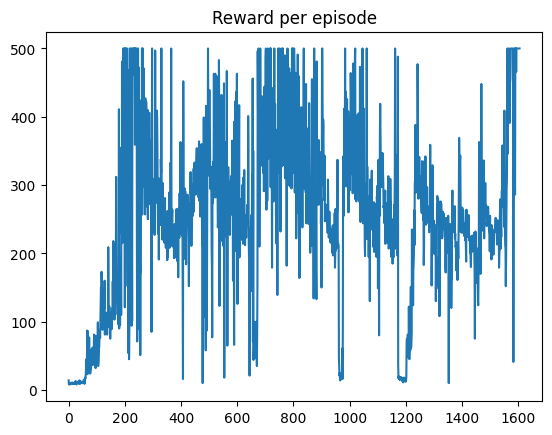

/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /content/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /content/video/rl-video-episode-0.mp4.
Moviepy - Writing video /content/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /content/video/rl-video-episode-0.mp4
Episode Reward: 743.0


In [15]:
if __name__ == "__main__":
  env = gym.make("CartPole-v1", render_mode="rgb_array")

  model = RLModel(env)
  reward_per_episode = []

  # watch untrained agent
  watch_agent(model, env, epsilon=0)

  # repeat until convergence
  n_episodes = 5000
  for it in range(n_episodes):
    state, _ = env.reset()
    episode_reward = 0
    done = False
    truncated = False
    while not (done or truncated):
      action = epsilon_greedy(model, state)
      next_state, reward, done, truncated, _ = env.step(action)

      # get the target
      if done:
        target = reward
      else:
        target = reward + DISCOUNT_FACTOR * np.max(model.predict_all_actions(next_state))

      grad = model.grad(state, action)
      error = target - model.predict(state, action)
      model.w += LR * error * grad

      # accumulate reward
      episode_reward += reward

      # update state
      state = next_state

    if (it + 1) % 50 == 0:
      print(f"Episode: {it + 1} / Reward: {episode_reward}")

    if it > 20 and np.mean(reward_per_episode[-20:]) >= 475:
      print("Early Exit")
      break

    reward_per_episode.append(episode_reward)

  # test trained agent
  test_reward = test_agent(model, env)
  print(f"Average test reward: {test_reward}")

  plt.plot(reward_per_episode)
  plt.title("Reward per episode")
  plt.show()

  # watch trained agent
  env = gym.make("CartPole-v1", render_mode="rgb_array")
  from gym.wrappers.record_video import RecordVideo
  env = RecordVideo(env, './video',  episode_trigger = lambda episode_number: True)
  watch_agent(model, env, epsilon=0)